<div class='heading'>
    <div style='float:left;'><h1>CPSC 4300/6300: Applied Data Science</h1></div>
    <img style="float: right; padding-right: 10px; width: 65px" src="https://raw.githubusercontent.com/bsethwalker/clemson-cs4300/main/images/clemson_paw.png"> </div>

# Week 11 | Lab: Introduction to Neural Networks

**Clemson University** </br>
**Instructor(s):** Tim Ransom </br>

------------------------------------------------------------------------
## Learning objectives

- Understand how a simple neural network works and code some of its functionality from scratch.
- Know how to install and run `tf.keras`.
- Explain the structure and function of a perceptron.
- Implement a simple real world example using a neural network.
- Perform matrix calculations relevant to neural networks.
- Use tf.keras to build and train a neural network.
- Evaluate the performance of a neural network using metrics like accuracy.
- Be able to think and do calculations in matrix notation. Also think of vectors and arrays as tensors.

In [ ]:
""" RUN THIS CELL TO GET THE RIGHT FORMATTING """
import requests
from IPython.core.display import HTML
css_file = 'https://raw.githubusercontent.com/bsethwalker/clemson-cs4300/main/css/cpsc6300.css'
styles = requests.get(css_file).text
HTML(styles)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
%matplotlib inline

import urllib
import io
from PIL import Image

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf

tf.keras.backend.clear_session()  # For easy reset of notebook state.

print(tf.__version__)  # You should see a 2.4.0

## Instructions for Running tf.keras with TensorFlow 2.4+ on Your Local Machine

### Step 1: Set Up a Virtual Environment

- To avoid conflicts with other Python packages, always use a virtual environment.
- Create a new virtual environment (instead of cloning):

```bash
conda create --name tf_env python=3.8 -y
```
- Replace tf_env with your preferred environment name.
- Make sure to specify Python 3.8 or a compatible version (TensorFlow 2.4 supports Python 3.6–3.9).

- Activate the virtual environment:

```bash
conda activate tf_env
```

### Step 2: Install TensorFlow
- Install TensorFlow using pip (it’s the recommended way to install TensorFlow):

```bash
pip install tensorflow==2.4.1
```

- Replace 2.4.1 with the desired version. To check compatibility, visit [TensorFlow Install](https://www.tensorflow.org/install).

- **Verify the installation:**

```bash
python -c "import tensorflow as tf; print(tf.__version__)"
```

- This should print 2.4.1 (or the version you installed).

### Step 3: Use tf.keras for Deep Learning
- Keras is included in TensorFlow, so you should use tf.keras. 

- **Example code:**

```python
import tensorflow as tf

# Define a model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
# Assuming `train_images` and `train_labels` are prepared
# model.fit(train_images, train_labels, epochs=5)
```

### Step 4: Simplify Imports

- To avoid using long names like tf.keras.layers.Dense, you can simplify imports:

```python
from tensorflow.keras import models, layers, optimizers, regularizers, preprocessing

# Example usage:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer=optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
```

### Step 5: Use TensorFlow Datasets

- You can use preloaded datasets in tf.keras.datasets, such as MNIST:

```python
from tensorflow.keras.datasets import mnist

# Load dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0
```

### **Important Notes:**
- Avoid Installing Standalone Keras:
- Do not install keras as a standalone library (pip install keras) unless you specifically need it. Use tf.keras from TensorFlow for compatibility.
- GPU Support (Optional): If you have a compatible GPU, install TensorFlow with GPU support by following [TensorFlow GPU Setup](https://www.tensorflow.org/guide/gpu).
    - For Systems with Old Keras/TensorFlow Installations:
    - Remove old versions first:
        ```bash
         pip uninstall keras tensorflow -y
        ```

## 1. Neural Networks 101

A neural network consists of layers that transform inputs using **weights**, **biases**, and **activation functions**. Each layer computes:

- **Affine Transformation**:
  $$
  a = W^T x + b
  $$

- **Activation Function**:
  $$
  u = \sigma(a)
  $$

We can simplify computation by **absorbing** the bias term into the input:
$$
a = W^T \cdot X_{\text{plus ones}}
$$

This lab introduces you to these operations using NumPy and TensorFlow.

## Neural Network Structure and Computation

Suppose we have an input vector:

$$
X = \{x_1, x_2, ..., x_L\}
$$

This input is passed through a **k-layered neural network**. Each layer has its own number of **nodes (neurons)**.

---

### 🔹 Layer Parameters

Let’s consider the **first hidden layer** with $ J $ nodes:

- The **weights** for this layer are stored in a matrix:  
  $$
  W \in \mathbb{R}^{J \times (L + 1)}
  $$
  *(The +1 accounts for the bias term.)*

- The **biases** for each node are stored in a vector:  
  $$
  b \in \mathbb{R}^{J}
  $$

---

### 🔹 Affine Transformation

The output of the affine transformation for this layer is:

$$
a = W^T X + b
$$

To simplify this, we can **absorb the bias term** by augmenting the input vector with a **column of ones**:

- The augmented input becomes:  
  $$
  X' \in \mathbb{R}^{L+1}
  $$
- The bias is now embedded in the weights, and the equation simplifies to:  
  $$
  a = W^T X'
  $$

The result $ a \in \mathbb{R}^J $ contains the pre-activation values for each of the $ J $ neurons.

---

### 🔹 Activation Function

To obtain the final output of each node, we apply an **activation function** $ \sigma $ element-wise:

$$
u = \sigma(a)
$$

Or for each component:

$$
u_j = \sigma(a_j), \quad \text{for } j = 1, 2, ..., J
$$

---


In this lab, we will implement this using **matrix operations** with NumPy or TensorFlow. 


```python
# Example (pseudo-code)
a = np.dot(W.T, X_augmented)
u = sigmoid(a)


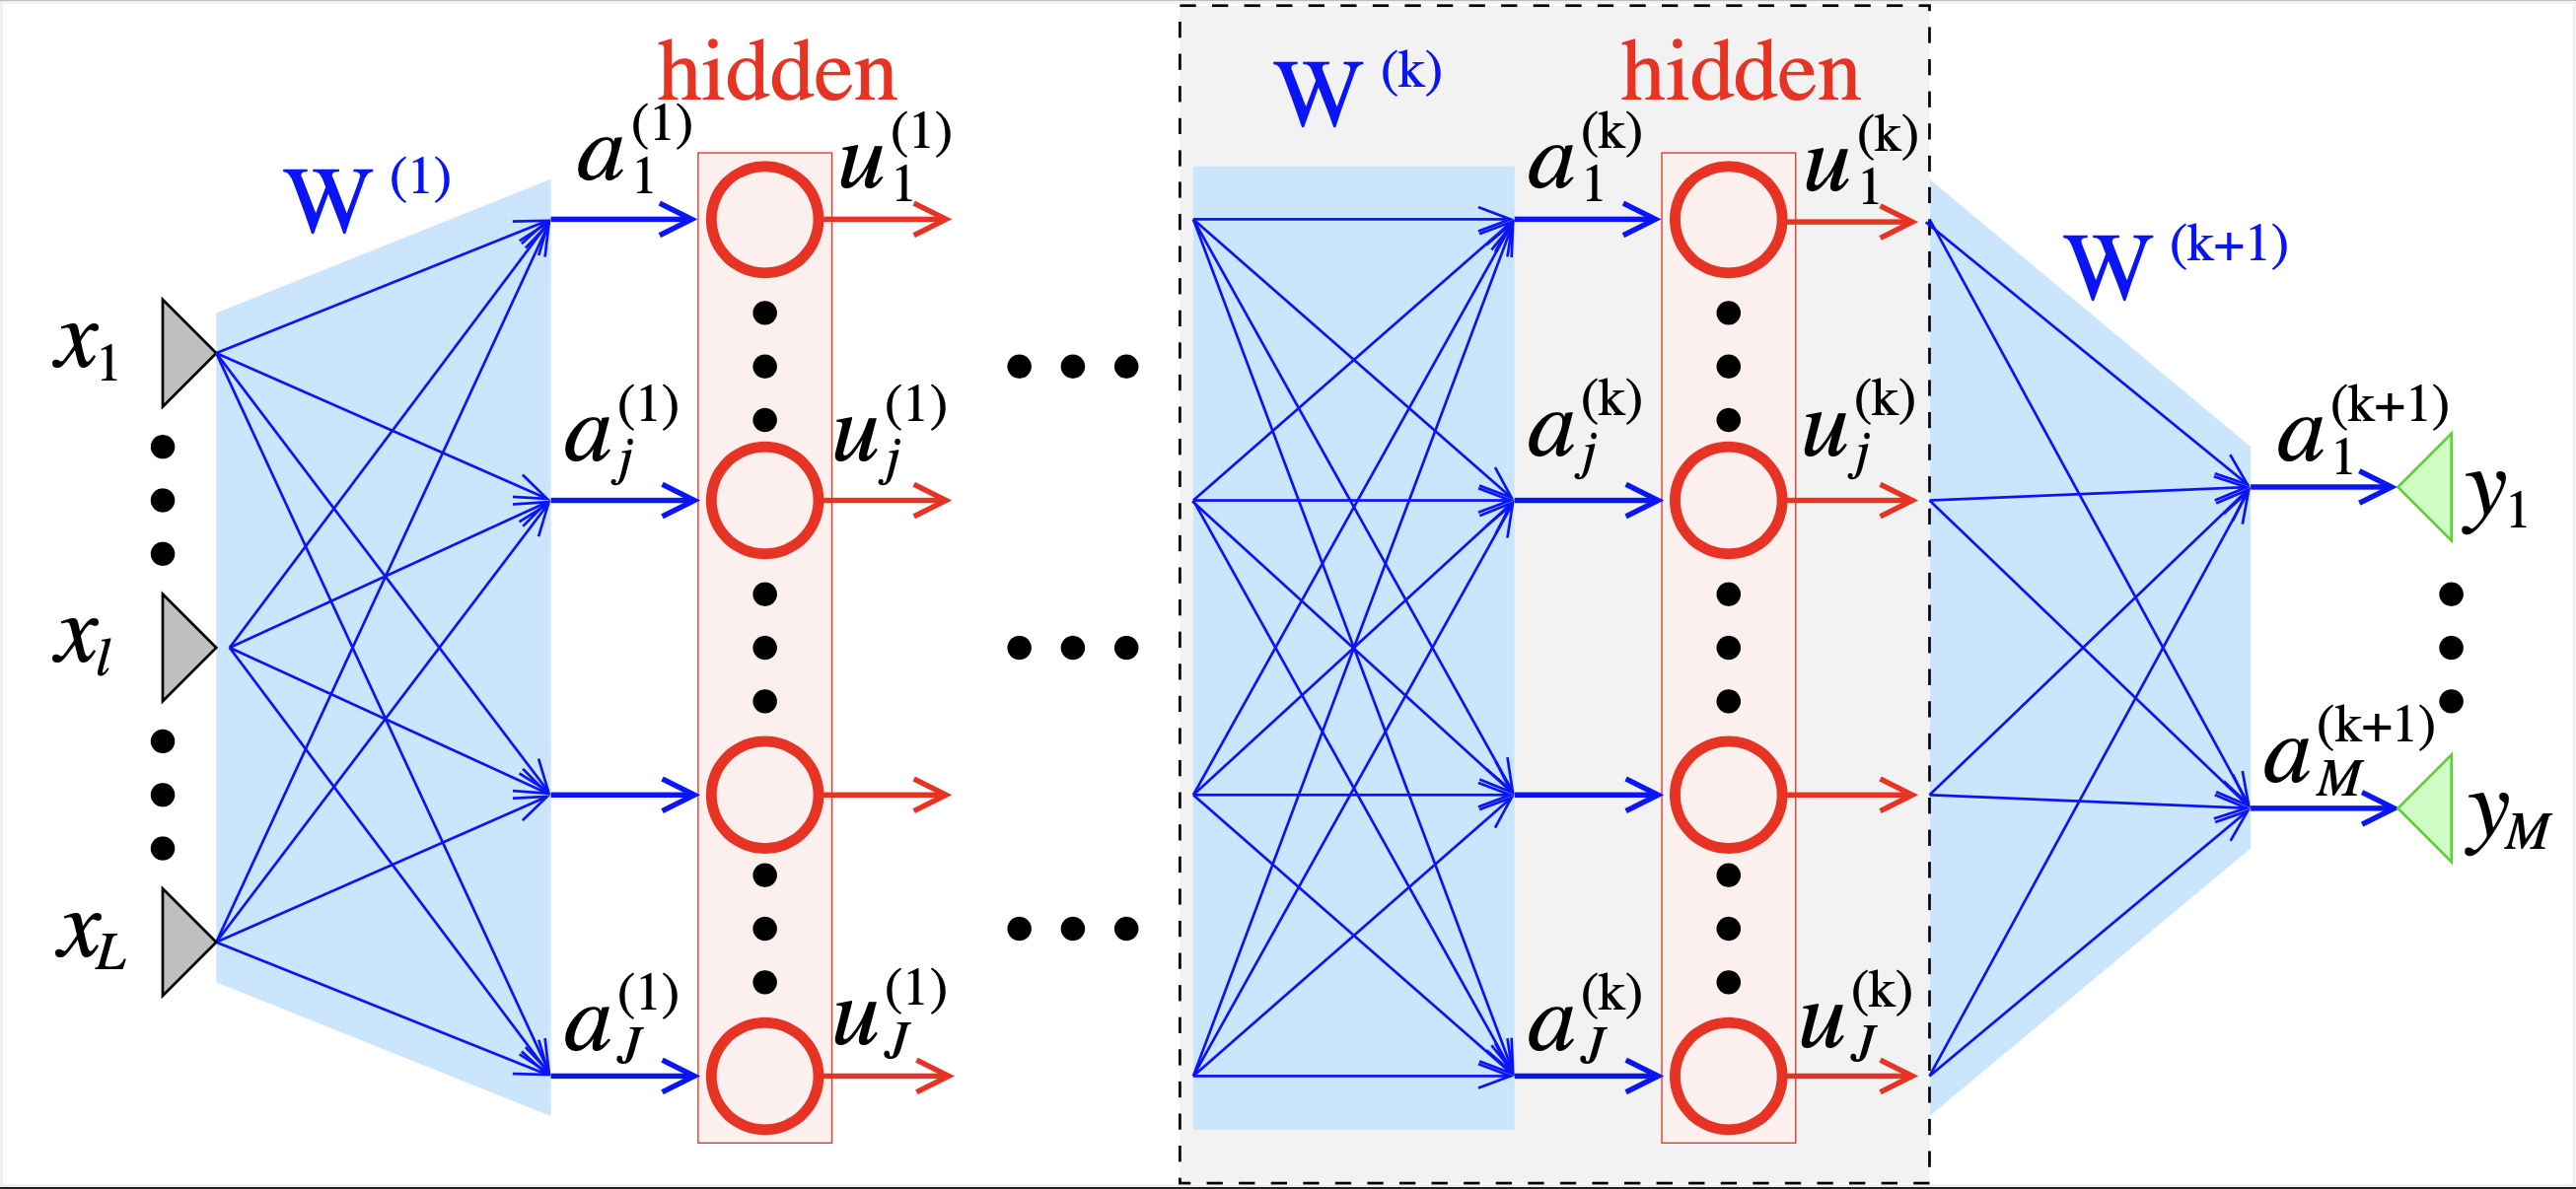

---------
**Image source:** `Modern Mathematical Methods for Computational Science and Engineering` Efthimios Kaxiras and Athanassios Fokas.

Let's assume that we have 3 input points (L = 3), two hidden layers ($k=2$), and 2 nodes in each layer ($J=2$)<br>

### Input Layer

$𝑋$={$𝑥_1,𝑥_2,x_3$}

### First Hidden Layer

\begin{equation}
 \begin{aligned}
a^{(1)}_1 = w^{(1)}_{10} + w^{(1)}_{11}x_1 + w^{(1)}_{12}x_2 + w^{(1)}_{13}x_3 \\
a^{(1)}_2 = w^{(1)}_{20} + w^{(1)}_{21}x_1 + w^{(1)}_{22}x_2 + w^{(1)}_{23}x_3 \\ 
\end{aligned}
\end{equation}
<br> All this in matrix notation: $$\mathbf{a} = \mathbf{W^T}X$$
<br> NOTE: in $X$ we have added a column of ones to account for the bias<BR><BR>
**Then the sigmoid is applied**:
\begin{equation}
 \begin{aligned}
u^{(1)}_1 = \sigma(a^{(1)}_1) \\
u^{(1)}_2 = \sigma(a^{(1)}_2) \\
\end{aligned}
\end{equation}
    
or in matrix notation: $$\mathbf{u} = \sigma\left(\mathbf{a}\right)$$

### Second Hidden Layer

\begin{equation}
 \begin{aligned}
a^{(2)}_1 = w^{(2)}_{10} + w^{(2)}_{11}u^{(1)}_1 + w^{(2)}_{12}u^{(1)}_2 + w^{(2)}_{13}u^{(1)}_3 \\
a^{(2)}_2 = w^{(2)}_{20} + w^{(2)}_{21}u^{(1)}_1 + w^{(2)}_{22}u^{(1)}_2 + w^{(2)}_{23}u^{(1)}_3 \\ 
\end{aligned}
\end{equation}
<br>

**Then the sigmoid is applied**:

\begin{equation}
 \begin{aligned}
u^{(2)}_1 = \sigma(a^{(2)}_1) \\
u^{(2)}_2 = \sigma(a^{(2)}_2) \\
\end{aligned}
\end{equation}

### Output Layer

#### If the output is categorical:

For example with four classes ($M=4$): $Y$={$y_1, y_2, y_3, y_4$}, we have the affine and then the sigmoid is lastly applied: 

\begin{equation}
 \begin{aligned}
a^{(3)}_1 = w^{(3)}_{10} + w^{(3)}_{11}u^{(2)}_1 + w^{(3)}_{12}u^{(2)}_2 \\
a^{(3)}_2 = w^{(3)}_{20} + w^{(3)}_{21}u^{(2)}_1 + w^{(3)}_{22}u^{(2)}_2 \\ 
a^{(3)}_3 = w^{(3)}_{30} + w^{(3)}_{31}u^{(2)}_1 + w^{(3)}_{32}u^{(2)}_2 \\
a^{(3)}_4 = w^{(3)}_{40} + w^{(3)}_{41}u^{(2)}_1 + w^{(3)}_{42}u^{(2)}_2 \\
\end{aligned}
\end{equation}
<br>
\begin{equation}
 \begin{aligned}
y_1 = \sigma(a^{(3)}_1) \\
y_2 = \sigma(a^{(3)}_2) \\
y_3 = \sigma(a^{(3)}_3) \\
y_3 = \sigma(a^{(3)}_4) \\
\end{aligned}
\end{equation}
$\sigma$ will be softmax in the case of multiple classes and sigmoid for binary.
<BR>
    
#### If the output is a number (regression):

We have a single y as output:

\begin{equation}
 \begin{aligned}
y = w^{(3)}_{10}+ w^{(3)}_{11}u^{(2)}_1 + w^{(3)}_{12}u^{(2)}_2 + w^{(3)}_{13}u^{(2)}_3 \\
\end{aligned}
\end{equation}


### 1.1 Matrix Calculations for Neural Networks

Let's practice the core matrix operations used in neural networks.

In [ ]:
a = np.array([[1, 0], [0, 1], [2, 3]])
b = np.array([[4, 1, 1], [2, 2, 1]])
print(np.matrix(a))
print('\n------\n')
print(np.matrix(b))

#### Matrix multiplication using Tensorflow and numpy:

In [ ]:
c = tf.matmul(a, b) # the tensorflow way
print(c)
print('\n------\n')
d = np.dot(a, b) # the numpy way
print(d)

### How to add the constants in the matrix: 
### Adding bias column

In [ ]:
a = [[1, 0], [0, 1]]
ones = np.ones((len(a),1)) 
# Add bias column
a_augmented = np.append(a, ones, axis=1)
a_augmented

## Activation Functions

<div class="exercise"><b>Exercise 1: Plot the sigmoid function.</b></div>

1. Define the Function:
    - Write a Python function named `sigmoid` to compute the sigmoid using the formula

        \begin{align}
        \sigma = \dfrac{1}{1+e^{-2(x-c)/a}} \qquad\text{(1.1)}
        \textrm{}
        \end{align}

    - The function should take three parameters:
        - `𝑥` : The input array or value.
        - `𝑐` : The horizontal shift of the sigmoid curve.
        - `𝑎` : The steepness of the curve.
    
2. Generate Data:
    - Create an array `x` of 500 equally spaced points between -5 and 5 using `np.linspace`. - **see [numpy.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)**
    - Use NumPy for mathematical computations.
    - Use defined sigmoid() function to compute the sigmoid function using `x`.
    - Use `np.tanh(x)` to compute the tanh function.
    - Store these values in `sigmoid_y` and `tanh_y` respectively.

3. Plot Both Functions:
    - Plot the sigmoid and tanh functions on the same graph for comparison.
    - Label the axes, add a legend, and include a title for the plot.


4. Experiment with Parameters:
    - Modify the 𝑐 (shift) and 𝑎 (steepness) parameters in the sigmoid function to observe their effects:
    - For example:
        - `𝑐`= 1: Shifts the curve to the right.
        - `𝑎` = 2 : Makes the curve more gradual.


5. Write Your Observations:
    - What differences do you notice between the sigmoid and tanh functions?
    - How do the parameters `𝑐` and `𝑎` affect the sigmoid function?

In [ ]:
"""Write your code for exercise 1 here:"""

# your code here
raise NotImplementedError

<div class="theme"> Question 1:</div> 

What are key differences between the sigmoid and tanh functions? (Select all that apply)

1. The sigmoid function outputs values between 0 and 1, while tanh outputs between -1 and 1.

2. Both functions are symmetric around zero.

3. The tanh function grows faster than the sigmoid function for the same input range.

4. The sigmoid function can output negative values, while tanh cannot.

5. The tanh function is centered around zero, which often helps with faster convergence in neural networks.

**Store your answers in a list named `answer` in the code cell below.**

In [ ]:
"""Your answer for Question 1 here:"""
# your code here
raise NotImplementedError

## Function Approximation with Neurons

We now want to approximate **Gaussian function**:

$$
f(x) = e^{-x^2}
$$

You will simulate how well a single neuron can approximate this function.

<div class="exercise"><b>Exercise 2: </b> Approximate a Gaussian function using a node and manually adjusting the weights. Start with one layer with one node and move to two nodes.</div>

- The task is to approximate (learn) a function $f\left(x\right)$ given some input $x$.  
- For this exercise, the function we will try to learn is a Gaussian function: 

\begin{align}
f\left(x\right) = e^{-x^{2}}
\textrm{}
\end{align}

- Input 𝑥 should be thought of as a single scalar value, even though it is represented as a vector in the code.

> **Complete following sub-exercises in order to complete exercise 2.**

<div class="exercise"><b>Exercise 2.1:</b> Plot a <b>Gaussian function</b> using NumPy and Matplotlib. </div>

---

We are trying to approximate the following function:

**Gaussian function:**

$$
f(x) = e^{-x^2}
$$


1. **Define the Gaussian Function**  
   Write a Python function named `gaussian(x)` that returns the value of $ e^{-x^2} $ for a given input array or scalar `x`.

2. **Generate Input Data**  
   Create a NumPy array `x` with **500 equally spaced values** in the interval from **-5 to 5** using `np.linspace`.

3. **Evaluate the Function**  
   Use your `gaussian()` function to compute values of \( f(x) \) for the `x` array. Store the result in a variable named `f`.

4. **Plot the Function**  
   Use `plt.plot()` to visualize the function:
   - Add a plot **title**, and label the **x-axis** and **y-axis**.
   - Add dashed horizontal and vertical lines at 0 using `plt.axhline()` and `plt.axvline()` for reference.
   - Add a **legend** and enable the **grid**.

> 💡 *This exercise will help you understand how a single node can represent smooth, continuous functions like a Gaussian, which is useful when constructing neural networks.*


In [ ]:
"""Write your code for exercise 2.1 here:"""
# your code here
raise NotImplementedError

<div class="exercise"><b>Exercise 2.2:</b> Implement a Single Neuron: Affine + Sigmoid
</div>

Implement a single node that performs a linear transformation (affine) and applies a sigmoid activation function to approximate a non-linear function.
Define following functions.

1. Define the `Affine Transformation`:
    - Write a Python function named `affine` that performs the following operation: `𝑧 = 𝑤 ⋅ 𝑥 + 𝑏`

```python
def affine(x, w, b):
    """Return affine transformation of x
    
    INPUTS
    ======
    x: A numpy array of points in x
    w: An array representing the weight of the perceptron
    b: An array representing the biases of the perceptron
    
    RETURN
    ======
    z: A numpy array of points after the affine transformation
       z = wx + b
    """
    
    # Code goes here
    return z
```

2. Define the Sigmoid Activation Function:
    - Write a Python function named `sigmoid` that computes the logistic sigmoid: $$\sigma\left(z\right) = \dfrac{1}{1 + e^{-z}}.$$ <br> 
    
```python
def sigmoid(z):
    """
    Compute the logistic sigmoid activation function.

    INPUTS:
    z: A numpy array of affine-transformed values

    RETURN:
    s: A numpy array of points after applying the sigmoid function
       s = 1 / (1 + e^(-z))
    """
    return 1 / (1 + np.exp(-z))
```

**These represent the building blocks of a simple neural network node.**

In [ ]:
"""Write your code for exercise 2.2 here:"""

# your code here
raise NotImplementedError

## Let's Visualize Single Neuron Output vs. Target

- Using your `affine()` and `sigmoid()` functions with different weight and bias values:


```python
w = [-5.0, 0.1, 5.0]
b = [0.0, -1.0, 1.0]
```

In [ ]:
# 1. Setup Parameters

w = [-5.0, 0.1, 5.0] # Create a list of weights
b = [0.0, -1.0, 1.0] # Create a list of biases

**These parameters will be passed into your affine() and sigmoid() functions to simulate the output of a single neuron.**

In [ ]:
# 2. Plot the True Function (using the function f(x) = exp(-x^2) that you computed in Exercise 2.1)
fig, ax = plt.subplots(1,1, figsize=(9,5))
SIZE = 16

ax.plot(x, f, lw=4, ls='-.', label='True function')

# 3. Plot the Neuron Outputs
for wi, bi in zip(w, b):
    h = sigmoid(affine(x, wi, bi))
    ax.plot(x, h, lw=4, label=r'$w = {0}$, $b = {1}$'.format(wi,bi))
    
ax.set_title('Single neuron network', fontsize=SIZE)

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=SIZE) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=SIZE)

ax.tick_params(labelsize=SIZE) # Make the tick labels big enough to read

ax.legend(fontsize=SIZE, loc='best'); # Create a legend and make it big enough to read

The sigmoid function always outputs an S-shaped curve. No matter how you adjust $w$ and $b$, its shape remains limited in complexity.

We didn't do an exhaustive search of the weights and biases, but it sure looks like this single perceptron is never going to match the actual function.  Again, we shouldn't be suprised about this.  The output layer of the network is simple the logistic function, which can only have so much flexibility.

In above exercise, you saw the limits of a single neuron. While weights and biases stretch and shift the sigmoid, a single curve cannot fit a bell-shaped function like a Gaussian. In the next steps, you’ll see how multiple neurons working together can improve function approximation.

Let's try to make our network more flexible by using **more nodes**!

## Multiple Perceptrons in a Single Layer

So far, we've seen that a **single neuron** has limited capacity to approximate complex functions. To improve our model, we can:

- **Increase depth** by stacking layers
- **Increase width** by adding more neurons to the same layer

In this section, we'll explore **wider networks** by using **multiple neurons in a single layer**.

---

We aim to approximate the following function:

$$
f(x) = e^{-x^2}
$$

Using a neural network with **two neurons** in one layer and a linear combination as output.

---

#### Step 1: Compute Each Neuron’s Output

Let’s define:

- Input points: `x`
- Target function: `f(x)`
- Neuron parameters: weights `w` and biases `b`
- Activation: sigmoid

In [ ]:
x = np.linspace(-5.0, 5.0, 500) # input points
f = np.exp(-x*x) # data

w = np.array([3.5, -3.5])
b = np.array([3.5, 3.5])

# Affine transformations
z1 = w[0] * x + b[0]
z2 = w[1] * x + b[1]

# Node outputs
h1 = sigmoid(z1)
h2 = sigmoid(z2)

#### Step 2: Visualize Individual Neuron Outputs

**Now let's plot things and see what they look like.**

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(9,5))

ax.plot(x, f, lw=4, ls = '-.', label='True function')
ax.plot(x, h1, lw=4, label='First neuron')
ax.plot(x, h2, lw=4, label='Second neuron')

# Set title
ax.set_title('Comparison of Neuron Outputs', fontsize=SIZE)

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=SIZE) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=SIZE)

ax.tick_params(labelsize=SIZE) # Make the tick labels big enough to read

ax.legend(fontsize=SIZE, loc='best'); # Create a legend and make it big enough to read

Both neuron outputs are sigmoids — they cannot match the bell shape of the Gaussian individually. But what happens when we combine them?
Of course, to get the network prediction we must combine these two sigmoid curves somehow.  First we'll just add $h_{1}$ and $h_{2}$ without any weights to see what happens.

#### Note
We are **not** doing classification here.  We are trying to predict an actual function.  The sigmoid activation is convenient when doing classification because you need to go from $0$ to $1$.  However, when learning a function, we don't have as good of a reason to choose a sigmoid.

#### Step 3: Combine Neuron Outputs

In [ ]:
wout = np.ones(2)  # Output layer weights
bout = -1          # Output bias

# Network output
yout = wout[0] * h1 + wout[1] * h2 + bout

#### Step 4: Plot Combined Network Output

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(9,5))

ax.plot(x, f, ls='-.', lw=4, label=r'True function')
ax.plot(x, yout, lw=4, label=r'$y_{out} = h_{1} + h_{2}$')

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=SIZE) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=SIZE)

ax.tick_params(labelsize=SIZE) # Make the tick labels big enough to read

ax.legend(fontsize=SIZE, loc='best') # Create a legend and make it big enough to read

Very cool!  Combining two sigmoid activations produces a much more expressive function. It starts to resemble a Gaussian curve, though it still isn't perfect but now we have some hope.  

We can do better.  There are three obvious options at this point:
1. Increase the number of neurons
2. Tune the activation functions
3. Adjust the weights and biases using learning algorithms

#### We’ll leave deeper exploration for upcoming labs, where we’ll build trainable neural networks using tf.keras.

## 2 - Tensors, Fashion, and Reese Witherspoon

We can think of tensors as multidimensional arrays of real numerical values; their job is to generalize matrices to multiple dimensions. While tensors first emerged in the 20th century, they have since been applied to numerous other disciplines, including machine learning. Tensor decomposition/factorization can solve, among other, problems in unsupervised learning settings, temporal and multirelational data. For those of you that will get to handle images for Convolutional Neural Networks, it's a good idea to have the understanding of tensors of rank 3.

We will use the following naming conventions:

- scalar = just a number = rank 0 tensor  ($a$ ∈ $F$,)
<BR><BR>
- vector = 1D array = rank 1 tensor ( $x = (\;x_1,...,x_i\;)⊤$ ∈ $F^n$ )
<BR><BR>
- matrix = 2D array = rank 2 tensor ( $\textbf{X} = [a_{ij}] ∈ F^{m×n}$ )
<BR><BR>
- 3D array = rank 3 tensor ( $\mathscr{X} =[t_{i,j,k}]∈F^{m×n×l}$ )
<BR><BR>
- $\mathscr{N}$D array = rank $\mathscr{N}$ tensor ( $\mathscr{T} =[t_{i1},...,t_{i\mathscr{N}}]∈F^{n_1×...×n_\mathscr{N}}$ ) <-- Things start to get complicated here...
    

### Tensor indexing
We can create subarrays by fixing some of the given tensor’s indices. We can create a vector by fixing all but one index. A 2D matrix is created when fixing all but two indices. For example, for a third order tensor the vectors are
<br><BR>
$\mathscr{X}[:,j,k]$ = $\mathscr{X}[j,k]$ (column), <br>
$\mathscr{X}[i,:,k]$ = $\mathscr{X}[i,k]$ (row), and <BR>
$\mathscr{X}[i,j,:]$ = $\mathscr{X}[i,j]$ (tube) <BR>
 
### Tensor multiplication
We can multiply one matrix with another as long as the sizes are compatible ((n × m) × (m × p) = n × p), and also multiply an entire matrix by a constant. Numpy `numpy.dot` performs a matrix multiplication which is straightforward when we have 2D or 1D arrays. But what about > 3D arrays? The function will choose according to the matching dimentions but if we want to choose we should use `tensordot`, but, again, we **do not need tensordot** for this class. 

### Reese Witherspoon

This image is from the dataset [Labeled Faces in the Wild](http://vis-www.cs.umass.edu/lfw/person/Reese_Witherspoon.html) used for machine learning training. Images are 24-bit RGB images (height, width, channels) with 8 bits for each of R, G, B channel. Explore and print the array.

In [ ]:
FILE = 'https://raw.githubusercontent.com/bsethwalker/clemson-cs4300/main/images/Reese_Witherspoon.jpg'

In [ ]:
urllib.request.urlopen(FILE)

In [ ]:
response = requests.get(FILE)
image_bytes = io.BytesIO(response.content)

img = np.asarray(Image.open(image_bytes))
plt.imshow(img);

In [ ]:
# Image is 150x150 pixels with 3 color channels
img.shape

### Slicing tensors: slice along each axis

In [ ]:
# we want to show each color channel
fig, axes = plt.subplots(1, 3, figsize=(10,10))
for i, subplot in zip(range(3), axes):
    temp = np.zeros(img.shape, dtype='uint8')
    temp[:,:,i] = img[:,:,i]
    subplot.imshow(temp)
    subplot.set_axis_off()
plt.show()

### Multiplying Images with a scalar (just for fun, does not really help us in any way)

In [ ]:
temp = img
temp = temp * 2
plt.imshow(temp);

For more on image manipulation by `matplotlib` see: [matplotlib-images](https://matplotlib.org/3.1.1/tutorials/introductory/images.html)

## 3 - Anatomy of an Artificial Neural Network

- In Part 1 we hand-made a neural network by writing some simple python functions.  
- We focused on a regression problem where we tried to learn a function. 
- We practiced using the logistic activation function in a network with multiple nodes, but with a single or two hidden layers.  
#### Some of the key observations were:
- **Increasing the number of nodes allows us to represent more complicated functions** 
- **The weights and biases have a very big impact on the solution**
- **Finding the "correct" weights and biases is really hard to do manually**
- **There must be a better method for determining the weights and biases automatically**

We also didn't assess the effects of different activation functions or different network depths. 

### ![](https://raw.githubusercontent.com/bsethwalker/clemson-cs4300/main/images/keras.png)

https://www.tensorflow.org/guide/keras

`tf.keras` is TensorFlow's high-level API for building and training deep learning models. It's used for fast prototyping, state-of-the-art research, and production. `Keras` is a library created by François Chollet. After Google released Tensorflow 2.0, the creators of `keras` recommend that "Keras users who use multi-backend Keras with the TensorFlow backend switch to `tf.keras` in TensorFlow 2.0. `tf.keras` is better maintained and has better integration with TensorFlow features".

#### IMPORTANT:  In `Keras` everything starts with a Tensor of N samples as input and ends with a Tensor of N samples as output.

### The 3 parts of an ANN

- **Part 1: the input layer** (our dataset)
- **Part 2: the internal architecture or hidden layers** (the number of layers, the activation functions, the learnable parameters and other hyperparameters)
- **Part 3: the output layer** (what we want from the network)

**In the rest of this lab we will practice with end-to-end neural network training**

1. Load the data 
2. Define the layers of the model.
3. Compile the model.
4. Fit the model to the train set (also using a validation set).
5. Evaluate the model on the test set.
6. Plot metrics such as accuracy.
7. Predict on random images from test set.
8. Predict on  a random image from the web!

In [ ]:
seed = 7
np.random.seed(seed)

### Fashion MNIST 

![](https://raw.githubusercontent.com/bsethwalker/clemson-cs4300/main/images/drosophila.png)

MNIST, the set of handwritten digits is considered the Drosophila (fruit flies) of Machine Learning. It has been overused, though, so we will try a slight modification to it.

**Fashion-MNIST** is a dataset of clothing article images (created by [Zalando](https://github.com/zalandoresearch/fashion-mnist)), consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a **28 x 28** grayscale image, associated with a label from **10 classes**. The creators intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits. Each pixel is 8 bits so its value ranges from 0 to 255.

Let's load and look at it!

### 1. Load the data

In [ ]:
%%time
# get the data from keras
fashion_mnist = tf.keras.datasets.fashion_mnist

# load the data splitted in train and test! how nice!
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

# normalize the data by dividing with pixel intensity
# (each pixel is 8 bits so its value ranges from 0 to 255)
x_train, x_test = x_train / 255.0, x_test / 255.0

# classes are named 0-9 so define names for plotting clarity
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# plot
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [ ]:
plt.imshow(x_train[3], cmap=plt.cm.binary);

In [ ]:
x_train.shape, x_test.shape

In [ ]:
y_train.shape

### 2. Define the layers of the model.

In [ ]:
model = tf.keras.models.Sequential([
  
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(154, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(10, activation='softmax')
])

### 3. Compile the model

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
tf.keras.utils.plot_model(
    model,
    #to_file='model.png', # if you want to save the image
    show_shapes=True, # True for more details than you need
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96
)

### [Everything you wanted to know about a Keras Model and were afraid to ask](https://www.tensorflow.org/api_docs/python/tf/keras/Model)

### 4. Fit the model to the train set (also using a validation set)

This is the part that takes the longest.

-----------------------------------------------------------
**ep·och** <BR>
noun: epoch; plural noun: epochs. A period of time in history or a person's life, typically one marked by notable events or particular characteristics. Examples: "the Victorian epoch", "my Neural Netwok's epochs". <BR>
    
-----------------------------------------------------------

In [ ]:
%%time

# the core of the network training
history = model.fit(x_train, 
                    y_train, 
                    validation_split=0.33, 
                    epochs=50, 
                    verbose=2)

#### Save the model

You can save the model so you do not have `.fit` everytime you reset the kernel in the notebook. Network training is expensive!

For more details on this see [https://www.tensorflow.org/guide/keras/save_and_serialize](https://www.tensorflow.org/guide/keras/save_and_serialize)

In [ ]:
# save the model so you do not have to run the code everytime
model.save('models/fashion_model.h5')

# Recreate the exact same model purely from the file
#model = tf.keras.models.load_model('fashion_model.h5')

### 5. Evaluate the model on the test set.

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy={test_accuracy}')

if test_accuracy>0.8: print(f'Not bad!')

### 6. Plot metrics such as accuracy. 

#### We learn a lot by studying History!

You can learn a lot about neural networks by observing how they perform while training. You can issue `callbacks` in `keras`. The networks's performance is stored in a `keras` callback aptly named `history` which can be plotted. 

In [ ]:
print(history.history.keys())

In [ ]:
# plot accuracy and loss for the test set
fig, ax = plt.subplots(1,2, figsize=(20,6))

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'val'], loc='best')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'val'], loc='best');

### 7. Now let's use the Network for what it was meant to do: Predict!

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions[0]

In [ ]:
np.argmax(predictions[0]), class_names[np.argmax(predictions[0])]

Let's see if our network predicted right! Is the first item what was predicted?

In [ ]:
plt.figure()
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.xlabel(class_names[y_test[0]])
plt.colorbar();

### **Correct!!** Now let's see how confident our model is by plotting the probability values:

In [ ]:
# code source: https://www.tensorflow.org/tutorials/keras/classification
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [ ]:
i = 406
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

In [ ]:
i = 38
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

### 8. Predicting in the real world

Let's see if our network can generalize beyond the MNIST fashion dataset. Let's give it an random googled image of a boot. Does it have to be a clothing item resembling the MNIST fashion dataset? Can it be a puppy?

Download an image from the internet and resize it to 28x28. Here is the one I choose:

<img src="https://raw.githubusercontent.com/bsethwalker/clemson-cs4300/main/images/random_boot.png" alt="random boot" width="150" height="150">

In [ ]:
# Here is the one I chose from the web. I resized it to 28 x 28 and one channel. 
response = requests.get('https://raw.githubusercontent.com/bsethwalker/clemson-cs4300/main/images/random_boot.png')
image_bytes = io.BytesIO(response.content)

random_boot = np.array(Image.open(image_bytes))
random_boot.shape

In [ ]:
# make into one channel
random_boot = random_boot[:,:,0]
random_boot.shape

In [ ]:
plt.figure()
plt.imshow(random_boot, cmap=plt.cm.binary)
plt.xlabel('random boot from web')
plt.colorbar();

`tf.keras` models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [ ]:
# Add the image to a batch where it's the only member.
random_batch = (np.expand_dims(random_boot,0))
print(random_batch.shape)

In [ ]:
predictions_single = model.predict(random_batch)
print(predictions_single[0])
print(np.argmax(predictions_single[0]), class_names[np.argmax(predictions_single[0])])

#### Were we successful???

Let's now try a different one, a dress:

In [ ]:
response = requests.get('https://raw.githubusercontent.com/bsethwalker/clemson-cs4300/main/images/dress.jpeg')
image_bytes = io.BytesIO(response.content)

dress = np.array(Image.open(image_bytes))

plt.figure()
plt.imshow(dress, cmap=plt.cm.binary)
plt.xlabel('Random dress from web')
plt.colorbar();

In [ ]:
# make into one channel
dress = dress[:,:,0]
dress.shape

In [ ]:
dresses = (np.expand_dims(dress,0))
print(dresses.shape)

In [ ]:
predictions_single = model.predict(dresses)
print(predictions_single[0])
print(np.argmax(predictions_single[0]), class_names[np.argmax(predictions_single[0])])

#### Did not do so well this time... Well, our model accuracy is not that good anyway. 

Next Check out Neural Networks regularization and Convolutional Neural Networks!

# END